In [212]:
#################################################################################
# Регрессия. Задание на выбор:                                                  #
# a) Исследовательская задача. Провести полный регрессионный анализ датасета.   #
#    Т.е. сделать гипотезы о линейных зависимостях и проверить эти гипотезы     #
#    (описать какими критериями пользовались).                                  #
# b) Техническая задача. Написать программу для подбора и тестирования          #
#    оптимальной регрессионной модели для плоских данных. Для полиномов         #
#    рассматривать параметр k - порядок полинома.                               #
#################################################################################

# Импортируем нужные библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# Находит оптимальную степень для полиномиальной регрессии
# Формат возвр. данных: y_pred, best_deg, best_r2
def findPolyModel(x, y, origin_x, delta, start_deg):
    # Вспомогательные переменные
    deg = start_deg
    prev_r2 = 0
    cur_r2 = 0
    have_exit = False
    model = LinearRegression()
    
    # Перебираем степени полиномов до момента, когда разница 
    # значений r2 будет меньше delta
    while not(have_exit):
        # Переходим в многомерное пространство
        poly = PolynomialFeatures(degree = deg)
        x_poly = poly.fit_transform(x)
        
        # Приближаем значения полиномом
        model.fit(x_poly, y)
        y_pred = model.predict(x_poly)
        cur_r2 = r2_score(y, y_pred)
        
        # Проверка на условие выхода из цикла
        if abs(cur_r2 - prev_r2) < delta:
            deg -= 1
            have_exit = True
        else:
            deg += 1
            prev_r2 = cur_r2
    
    # Рассчитываем приближенные значения для полинома 
    # оптимальной степени
    poly = PolynomialFeatures(degree = deg)
    x_poly = poly.fit_transform(x)
    origin_x_poly = poly.fit_transform(origin_x)
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)
    origin_x_pred = model.predict(origin_x_poly)
    
    # Формат возвр. данных: y_pred, best_deg, best_r2
    return origin_x_pred, deg, r2_score(y, y_pred)

# Генерирует набор случайных точек в соответствии 
# с нормальным распределением
def normalDistribution(f, interval, loc_x=0.0, scale_x=1.0, 
                       loc_y=0.0, scale_y=1.0, size=None):
    x = np.random.normal(loc_x, scale_x, size)
    index = np.argwhere((x < interval[0]) | (x > interval[1]))
    x = np.delete(x, index)
    x = np.sort(x)
    y = f(x) + np.random.normal(loc_y, scale_y, x.size)
    return x, y

# Выводит все данные на экран
def drawApproximation(norm_x, norm_y, origin_x, origin_y, approx_y, 
                      lim_x, lim_y):
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(12)
    fig.set_figheight(6)
    ax[0].set_title('Normal Distribution')
    ax[1].set_title('Polinomial Regression')
    ax[0].set_xlim(lim_x[0], lim_x[1])
    ax[1].set_xlim(lim_x[0], lim_x[1])
    ax[0].set_ylim(lim_y[0], lim_y[1])
    ax[1].set_ylim(lim_y[0], lim_y[1])
    ax[0].grid(linestyle = '--')
    ax[1].grid(linestyle = '--')
    ax[0].scatter(norm_x, norm_y, s=3, color='blue', label='Gaussian')
    ax[0].plot(origin_x, origin_y, color='orange', linestyle='--', label='Original')
    ax[1].plot(origin_x, approx_y, color='red', label='Polinom')
    ax[1].scatter(norm_x, norm_y, s=3, color='blue', label='Gaussian')
    ax[0].legend()
    ax[1].legend()
    plt.show()
    return None

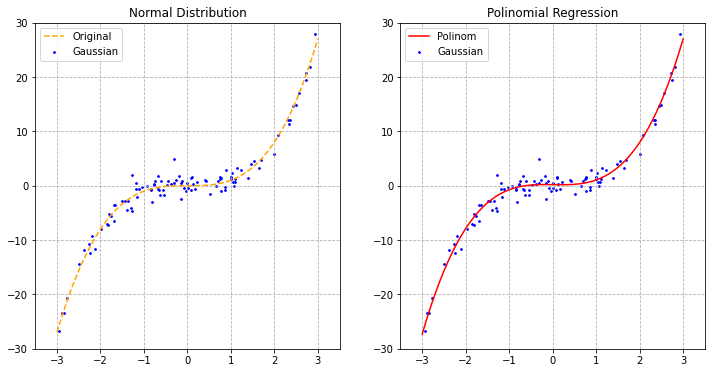

R2  :  0.9760234268631915
Deg :  3


In [236]:
# Базовая функция (Original)
def f(x):
    return x ** 3

# Инициализация генератора случайных чисел 
np.random.seed(2)

# Инициализация значений
origin_x = np.arange(-3, 3.1, 0.1)
origin_y = f(origin_x)
norm_x, norm_y = normalDistribution(f, [-3, 3], loc_x=0.0, scale_x=2, scale_y=1.2, size=120)

# Перевод массивов в более удобный формат
norm_x = norm_x[:, np.newaxis]
norm_y = norm_y[:, np.newaxis]
origin_x = origin_x[:, np.newaxis]
origin_y = origin_y[:, np.newaxis]

# Подбор оптимального полинома для решения задачи регрессии (стартовая степень 2)
approx_y, deg, r2 = findPolyModel(norm_x, norm_y, origin_x, 0.05, 2)

# Вывод на экран аппроксимации
drawApproximation(norm_x, norm_y, origin_x, origin_y, approx_y, lim_x=[-3.5, 3.5], lim_y=[-30, 30])

# Выписываем степень "deg" оптимального полинома и коэффициент детерминации "r2"
print('R2  : ', r2)
print('Deg : ', deg)

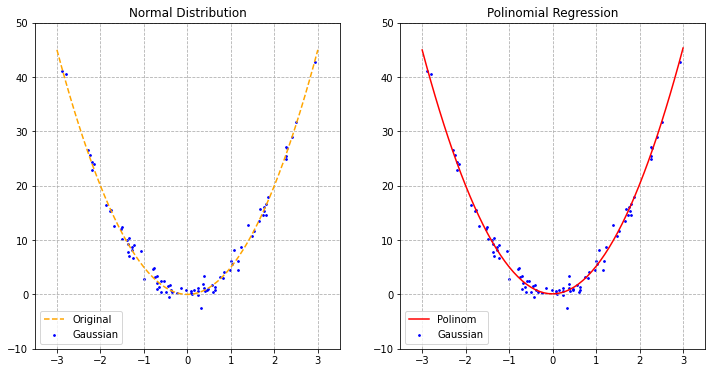

R2  :  0.9884651556434454
Deg :  2


In [222]:
# Базовая функция (Original)
def f(x):
    return 5 * x ** 2

# Инициализация генератора случайных чисел 
np.random.seed(1)

# Инициализация значений
origin_x = np.arange(-3, 3.1, 0.1)
origin_y = f(origin_x)
norm_x, norm_y = normalDistribution(f, [-3, 3], loc_x=0.0, scale_x=2, scale_y=1.2, size=100)

# Перевод массивов в более удобный формат
norm_x = norm_x[:, np.newaxis]
norm_y = norm_y[:, np.newaxis]
origin_x = origin_x[:, np.newaxis]
origin_y = origin_y[:, np.newaxis]

# Подбор оптимального полинома для решения задачи регрессии (стартовая степень 2)
approx_y, deg, r2 = findPolyModel(norm_x, norm_y, origin_x, 0.05, 2)

# Вывод на экран аппроксимации
drawApproximation(norm_x, norm_y, origin_x, origin_y, approx_y, lim_x=[-3.5, 3.5], lim_y=[-10, 50])

# Выписываем степень "deg" оптимального полинома и коэффициент детерминации "r2"
print('R2  : ', r2)
print('Deg : ', deg)

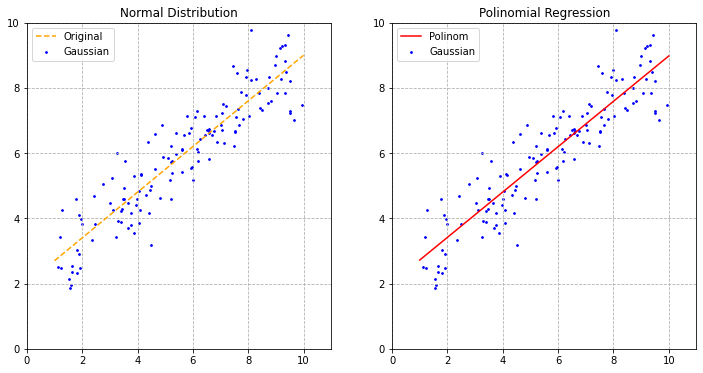

R2  :  0.8372290732806558
Deg :  1


In [225]:
# Базовая функция (Original)
def f(x):
    return 0.7 * x + 2

# Инициализация генератора случайных чисел 
np.random.seed(1)

# Инициализация значений
origin_x = np.arange(1, 10.1, 0.1)
origin_y = f(origin_x)
norm_x, norm_y = normalDistribution(f, [1, 10], loc_x=5.0, scale_x=5, scale_y=0.7, size=200)

# Перевод массивов в более удобный формат
norm_x = norm_x[:, np.newaxis]
norm_y = norm_y[:, np.newaxis]
origin_x = origin_x[:, np.newaxis]
origin_y = origin_y[:, np.newaxis]

# Подбор оптимального полинома для решения задачи регрессии (стартовая степень 1)
approx_y, deg, r2 = findPolyModel(norm_x, norm_y, origin_x, 0.05, 1)

# Вывод на экран аппроксимации
drawApproximation(norm_x, norm_y, origin_x, origin_y, approx_y, lim_x=[0, 11], lim_y=[0, 10])

# Выписываем степень "deg" оптимального полинома и коэффициент детерминации "r2"
print('R2  : ', r2)
print('Deg : ', deg)

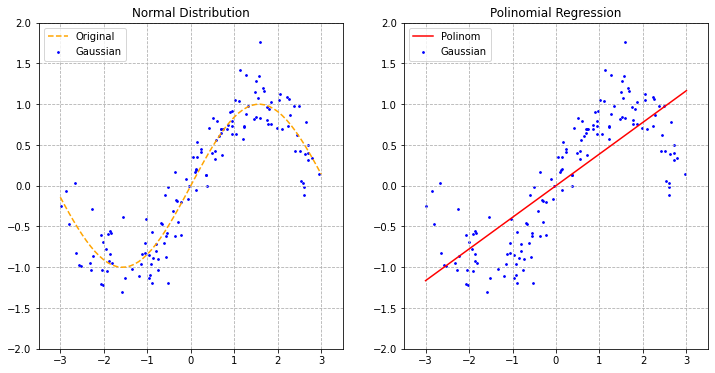

R2  :  0.6209874075195905
Deg :  1


In [283]:
# Базовая функция (Original)
def f(x):
    return np.sin(x)

# Инициализация генератора случайных чисел 
np.random.seed(1)

# Инициализация значений
origin_x = np.arange(-3, 3.1, 0.1)
origin_y = f(origin_x)
norm_x, norm_y = normalDistribution(f, [-3, 3], loc_x=0.0, scale_x=3, scale_y=0.25, size=200)

# Перевод массивов в более удобный формат
norm_x = norm_x[:, np.newaxis]
norm_y = norm_y[:, np.newaxis]
origin_x = origin_x[:, np.newaxis]
origin_y = origin_y[:, np.newaxis]

# Подбор оптимального полинома для решения задачи регрессии (стартовая степень 2)
approx_y, deg, r2 = findPolyModel(norm_x, norm_y, origin_x, 0.05, 1)

# Вывод на экран аппроксимации
drawApproximation(norm_x, norm_y, origin_x, origin_y, approx_y, lim_x=[-3.5, 3.5], lim_y=[-2, 2])

# Выписываем степень "deg" оптимального полинома и коэффициент детерминации "r2"
print('R2  : ', r2)
print('Deg : ', deg)

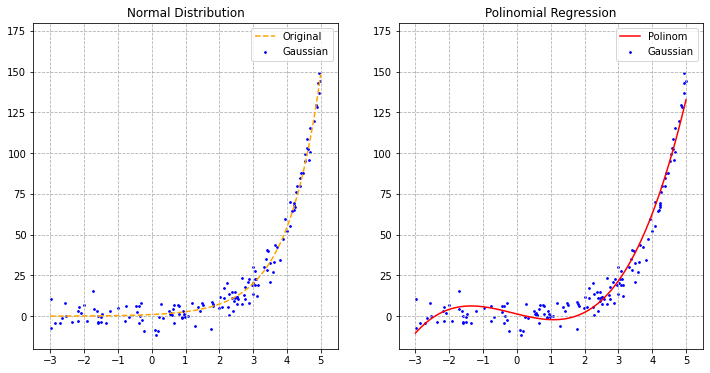

R2  :  0.964947275096669
Deg :  3


In [282]:
# Базовая функция (Original)
def f(x):
    return np.exp(x)

# Инициализация генератора случайных чисел 
np.random.seed(1)

# Инициализация значений
origin_x = np.arange(-3, 5.1, 0.1)
origin_y = f(origin_x)
norm_x, norm_y = normalDistribution(f, [-3, 5], loc_x=4.0, scale_x=5, scale_y=5, size=300)

# Перевод массивов в более удобный формат
norm_x = norm_x[:, np.newaxis]
norm_y = norm_y[:, np.newaxis]
origin_x = origin_x[:, np.newaxis]
origin_y = origin_y[:, np.newaxis]

# Подбор оптимального полинома для решения задачи регрессии (стартовая степень 1)
approx_y, deg, r2 = findPolyModel(norm_x, norm_y, origin_x, 0.05, 1)

# Вывод на экран аппроксимации
drawApproximation(norm_x, norm_y, origin_x, origin_y, approx_y, lim_x=[-3.5, 5.5], lim_y=[-20, 180])

# Выписываем степень "deg" оптимального полинома и коэффициент детерминации "r2"
print('R2  : ', r2)
print('Deg : ', deg)